# K-최근접 이웃 알고리즘(KNN)
   - 지도학습 알고리즘 중 하나
   - 직관적이고 간단함
   - 어떤 데이터가 주어지면 그 주변의 데이터를 살펴본 뒤 많은 데이터가 포함되어 있는 범주로 분류하는 방식
   - KNN의 특징은 훈련이 따로 필요 없다는 점. 즉 다른 모델들은 fit(X_Train , Y_Train)로 훈련을 시킴 , KNN은 훈련데이터를 저장하는게 전부
   - 모듈을 별도로 구축하지 않는다는 뜻으로 '게으른 모델' 이라 부름

## Model Loading

In [207]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#한글패치
import platform
from matplotlib import font_manager , rc

if platform.system() == 'Darwin':
  rc('font' , family = 'AppleGothic')
elif platform.system() == 'Windows':
  path = 'C:/Windows/Fonts/malgun.ttf'
  font_name = font_manager.FontProperties(fname = path).get_name()
  rc('font' , family = font_name)
else:
  print('모름')
plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

## DataSet Loading

In [208]:
## 생선의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 
                38.5, 38.5, 39.5, 41.0, 41.0]
## 생선의 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]

### 데이터 탐색

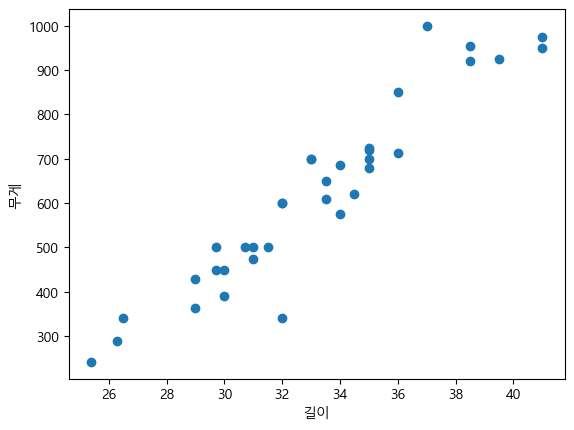

In [209]:
plt.scatter(bream_length , bream_weight)
plt.xlabel('길이')
plt.ylabel('무게')
plt.show()

In [210]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 
                12.2, 19.7, 19.9]

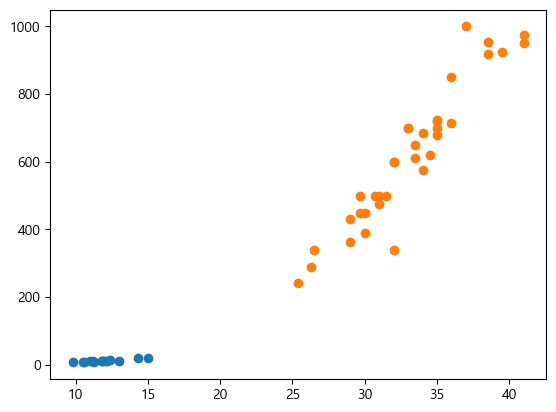

In [211]:
plt.scatter(smelt_length , smelt_weight)
plt.scatter(bream_length , bream_weight)
plt.show()

In [212]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [213]:
fish_data = [[l , w] for l , w in zip(length , weight)]
fish_data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [214]:
fish_target = [1]*35 + [0]*14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# Modeling

In [215]:
#최근접 이웃 분류 알고리즘
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data , fish_target)
kn.score(fish_data , fish_target)

1.0

## 예측(predict)

In [216]:
kn.predict([[30,600]])

array([1])

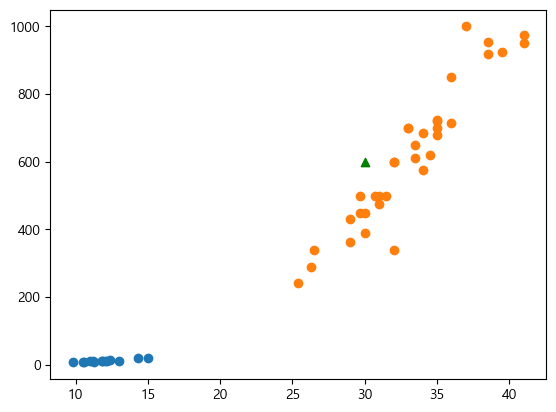

In [217]:
plt.scatter(smelt_length , smelt_weight)
plt.scatter(bream_length , bream_weight)
plt.scatter(30,600 , color = 'g' , marker = '^')
plt.show()

In [218]:
kn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [219]:
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [220]:
knn49 = KNeighborsClassifier(n_neighbors = 49)

In [221]:
knn49.fit(fish_data , fish_target)

KNeighborsClassifier(n_neighbors=49)

In [222]:
knn49.score(fish_data , fish_target)

0.7142857142857143

In [223]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [224]:
k = KNeighborsClassifier()
k.fit(train_input , train_target)
k.score(test_input , test_target)

0.0

In [225]:
input_array = np.array(fish_data)
target_array = np.array(fish_target)

In [226]:
np.random.seed(120)
index = np.arange(49)
np.random.shuffle(index)

In [227]:
train_input = input_array[index[:35]]
train_target = target_array[index[:35]]
test_input = input_array[index[35:]]
test_target = target_array[index[35:]]

In [228]:
k2 = KNeighborsClassifier()
k2.fit(train_input , train_target)
k2.score(test_input , test_target)

1.0

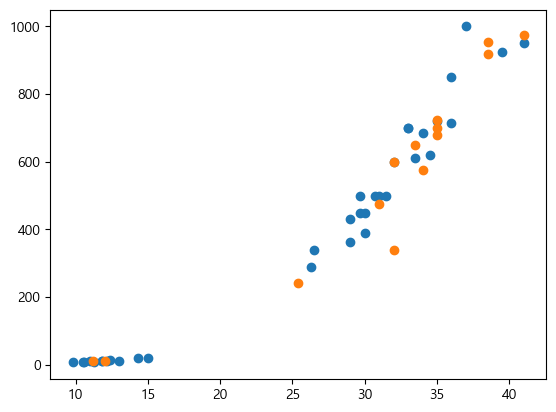

In [229]:
plt.scatter(train_input[: , 0] , train_input[: , 1])
plt.scatter(test_input[: , 0] , test_input[: , 1])
plt.show()

# 이웃 수 K의 최적화 찾기

In [230]:
kn = KNeighborsClassifier()
kn.fit(fish_data , fish_target)

for n in range(3,50):
    kn.n_neighbors = n
    score = kn.score(fish_data , fish_target)

    if score == 1:
        continue
    if score < 1:
        print(f'{n}개의 이웃 : {score}')        
        break

18개의 이웃 : 0.9795918367346939


# 데이터 전처리

In [231]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [232]:
#column_stack
np.column_stack([[1,2,3],[4,5,6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [233]:
fish_data = np.column_stack([fish_length , fish_weight])

In [234]:
fish_target = np.concatenate([np.ones(35) , np.zeros(14)])
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 훈련 데이터와 테스트 데이터 분리

In [235]:
from sklearn.model_selection import train_test_split
#전달된 배열 하나에 값을 두 개의 배열로 분할
#분할 비율(default - 8:2) : test_size

train_input , test_input , train_target , test_target = train_test_split(fish_data , fish_target , random_state = 120)

In [236]:
train_input , test_input , train_target , test_target = train_test_split(fish_data , fish_target , random_state = 120 , stratify = fish_target)

In [237]:
test_target

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.])

In [238]:
kn = KNeighborsClassifier()
kn.fit(train_input , train_target)
kn.score(test_input , test_target)

1.0

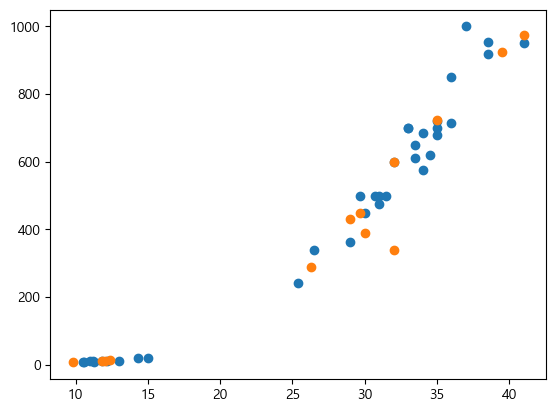

In [239]:
plt.scatter(train_input[: , 0] , train_input[: , 1])
plt.scatter(test_input[: , 0] , test_input[: , 1])
plt.show()

In [240]:
kn.predict([[25,150]])

array([0.])

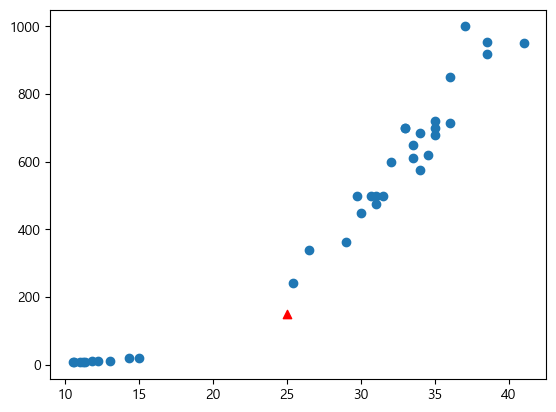

In [241]:
plt.scatter(train_input[: , 0] , train_input[: , 1])
plt.scatter(25,150 , marker = '^' , color = 'r')
plt.show()

In [242]:
distances , indexes = kn.kneighbors([[25,150]])
print(distances , indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[12  0 25 31 21]]


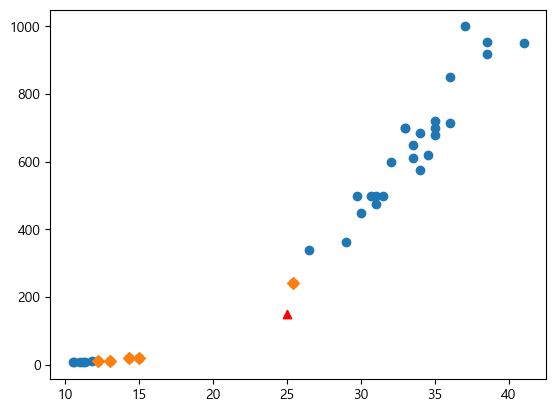

In [243]:
plt.scatter(train_input[: , 0] , train_input[: , 1])
plt.scatter(25,150 , marker = '^' , color = 'r')
plt.scatter(train_input[indexes , 0] , train_input[indexes , 1] , marker = 'D')
plt.show()

In [244]:
train_target[indexes]

array([[1., 0., 0., 0., 0.]])

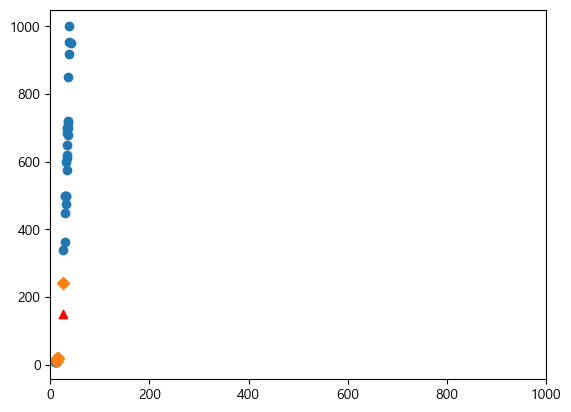

In [245]:
plt.scatter(train_input[: , 0] , train_input[: , 1])
plt.scatter(25,150 , marker = '^' , color = 'r')
plt.scatter(train_input[indexes , 0] , train_input[indexes , 1] , marker = 'D')
plt.xlim(0,1000)
plt.show()

## 피처 스케일링

- 두 특성의 스케일(scale)이 다를 때 , 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다.

    - 최소-최대 정규화(Min-Max Normalization)
        - Xnew = x-min(x) / max(x) - min(x)
    - Z-점수(Z-value standardization)
        - xnew = x - mean(x)/std(x)

In [246]:
mean = np.mean(train_input , axis = 0)
std = np.std(train_input , axis = 0)
train_scaled = (train_input - mean)/std

In [247]:
new = ([25,150] - mean)/std

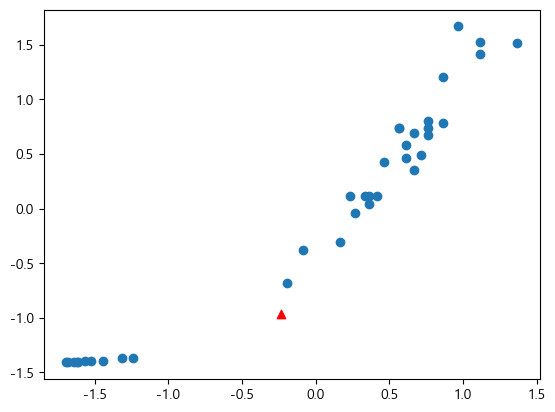

In [248]:
plt.scatter(train_scaled[: , 0] , train_scaled[: , 1])
plt.scatter(new[0] , new[1] , marker = '^' , color = 'r')
plt.show()

In [249]:
mean1 = np.mean(test_input , axis = 0)
std1 = np.std(test_input , axis = 0)
test_scaled = (test_input - mean1)/std1
test_scaled

array([[ 0.55112925,  0.62226001],
       [ 0.33286747,  0.16179894],
       [-1.36577857, -1.18919386],
       [-1.34679929, -1.18950083],
       [ 1.40519709,  1.7734127 ],
       [ 0.36133639, -0.02238549],
       [ 0.83581853,  1.00597758],
       [ 1.26285245,  1.61992568],
       [-1.55557142, -1.19901703],
       [-1.30884072, -1.17844977],
       [ 0.01021962, -0.32935954],
       [ 0.26643997,  0.10040413],
       [ 0.55112925, -0.17587252]])

In [250]:
kn.fit(train_scaled , train_target)
kn.score(test_scaled , test_target)

1.0

In [251]:
kn.predict([new])

array([1.])

In [252]:
distances1 , indexes1 = kn.kneighbors([new])
print(distances1 , indexes1)

[[0.28787746 0.607645   0.77235102 1.05620024 1.08089394]] [[12 16 14 27  0]]


In [253]:
train_target[indexes1]

array([[1., 1., 1., 1., 0.]])

# 확인 학습
- kaggle 데이터 Orange vs GrapeFrult

## 첫번째 방법

In [254]:
data = pd.read_csv('citrus.csv')

In [255]:
data.iloc[:5000,]

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
4995,orange,12.22,217.00,170,89,3
4996,orange,12.28,217.04,167,76,16
4997,orange,12.55,218.07,143,77,4
4998,orange,12.75,230.13,159,87,5


In [256]:
orange_diameter = list(data.iloc[:5000,1])
orange_weight = list(data.iloc[:5000,2])
Grape_diameter = list(data.iloc[5000:,1])
Grape_weight = list(data.iloc[5000:,2])

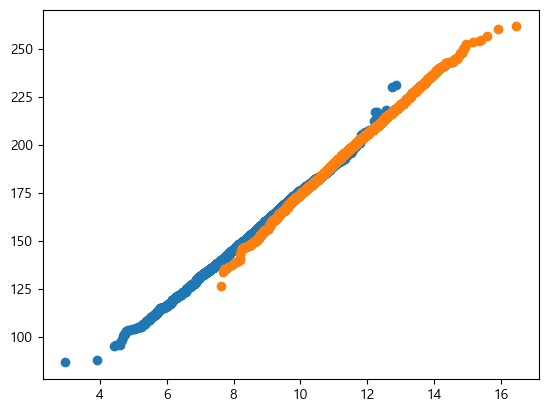

In [257]:
plt.scatter(orange_diameter , orange_weight)
plt.scatter(Grape_diameter , Grape_weight)
plt.show()

In [258]:
orange = np.column_stack([orange_diameter , orange_weight])

In [259]:
grape = np.column_stack([Grape_diameter , Grape_weight])

In [260]:
total = np.vstack([orange , grape])

In [261]:
target = np.concatenate([np.ones(5000) , np.zeros(5000)])

In [262]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(total , target)

KNeighborsClassifier()

In [263]:
kn.score(total , target)

0.9832

## scikit-learn 라이브러리를 이용한 방법

In [264]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [265]:
orange_diameter = list(data.iloc[:5000,1])
orange_weight = list(data.iloc[:5000,2])
Grape_diameter = list(data.iloc[5000:,1])
Grape_weight = list(data.iloc[5000:,2])

In [266]:
data.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [267]:
X = data[['diameter', 'weight', 'red', 'green', 'blue']]
Y = data['name']

In [268]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size = 0.1 , random_state = 110)

In [269]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [270]:
knn = KNeighborsClassifier()
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [271]:
knn.score(x_test , y_test)

0.906

In [272]:
knn.score(x_train , y_train)

0.9417777777777778

In [273]:
yhat = knn.predict(x_test)

In [274]:
x_test[0]

array([ 1.68558735,  1.70696076, -0.66720504,  0.59108329,  1.57386437])

In [275]:
knn.predict([[2.98 , 86.76 , 174 , 83 , 2]])

array(['orange'], dtype=object)

In [276]:
print(classification_report(yhat , y_test))

              precision    recall  f1-score   support

  grapefruit       0.91      0.90      0.91       505
      orange       0.90      0.91      0.91       495

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



In [277]:
orange_diameter = list(data.iloc[:5000,1])
orange_weight = list(data.iloc[:5000,2])
Grape_diameter = list(data.iloc[5000:,1])
Grape_weight = list(data.iloc[5000:,2])

In [278]:
orange_data = orange_diameter + Grape_diameter
len(fruit_data)

10000

In [279]:
grapefruit_data = orange_weight + Grape_weight

In [280]:
fruit_data = np.column_stack([orange_data , grapefruit_data])

In [281]:
len(fruit_data)

10000

In [282]:
fruit_target = np.concatenate([np.ones(5000) , np.zeros(5000)])
len(fruit_target)

10000

- 예측 데이터
   - 지름 10.19 , 무게 177.33
   - 지름 10.19 , 무게 178.53

In [283]:
fruit_train , fruit_test , target_train , target_test = train_test_split(fruit_data , fruit_target,test_size = 0.2 , random_state = 110)

In [284]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 21)
kn.fit(fruit_train , target_train)

KNeighborsClassifier(n_neighbors=21)

In [285]:
kn.score(fruit_train , target_train)

0.918

In [286]:
kn.score(fruit_test , target_test)

0.9145

In [287]:
result = [[10.19 , 177.33] , [10.19 , 178.53]]

In [288]:
kn.predict(result)


array([0., 1.])

# 붓꽃(IRIS) 품종 분류 분석
 - 꽃잎(petal)의 길이 , 너비
 - 꽃받침(sepal)의 길이 , 너비
 - 종류

In [289]:
from sklearn.datasets import load_iris

In [290]:
iris = load_iris()

In [291]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

- sklearn의 데이터는 딕셔너리와 유사한 bunch 형태로 변환함.

In [292]:
# iris의 키 추출

iris.keys()
print(iris.DESCR[:193])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


## 데이터 탐색

In [293]:
## iris를 데이터 프레임 형태로 변환
df = pd.DataFrame(iris.data , columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [294]:
species = pd.Series(iris.target , dtype = 'category')
# 정형화된 값을 문자열로 변환
species = species.cat.rename_categories(iris.target_names)
df['species'] = species

In [295]:
iris.data.shape

(150, 4)

In [296]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width' , 'species']

In [297]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


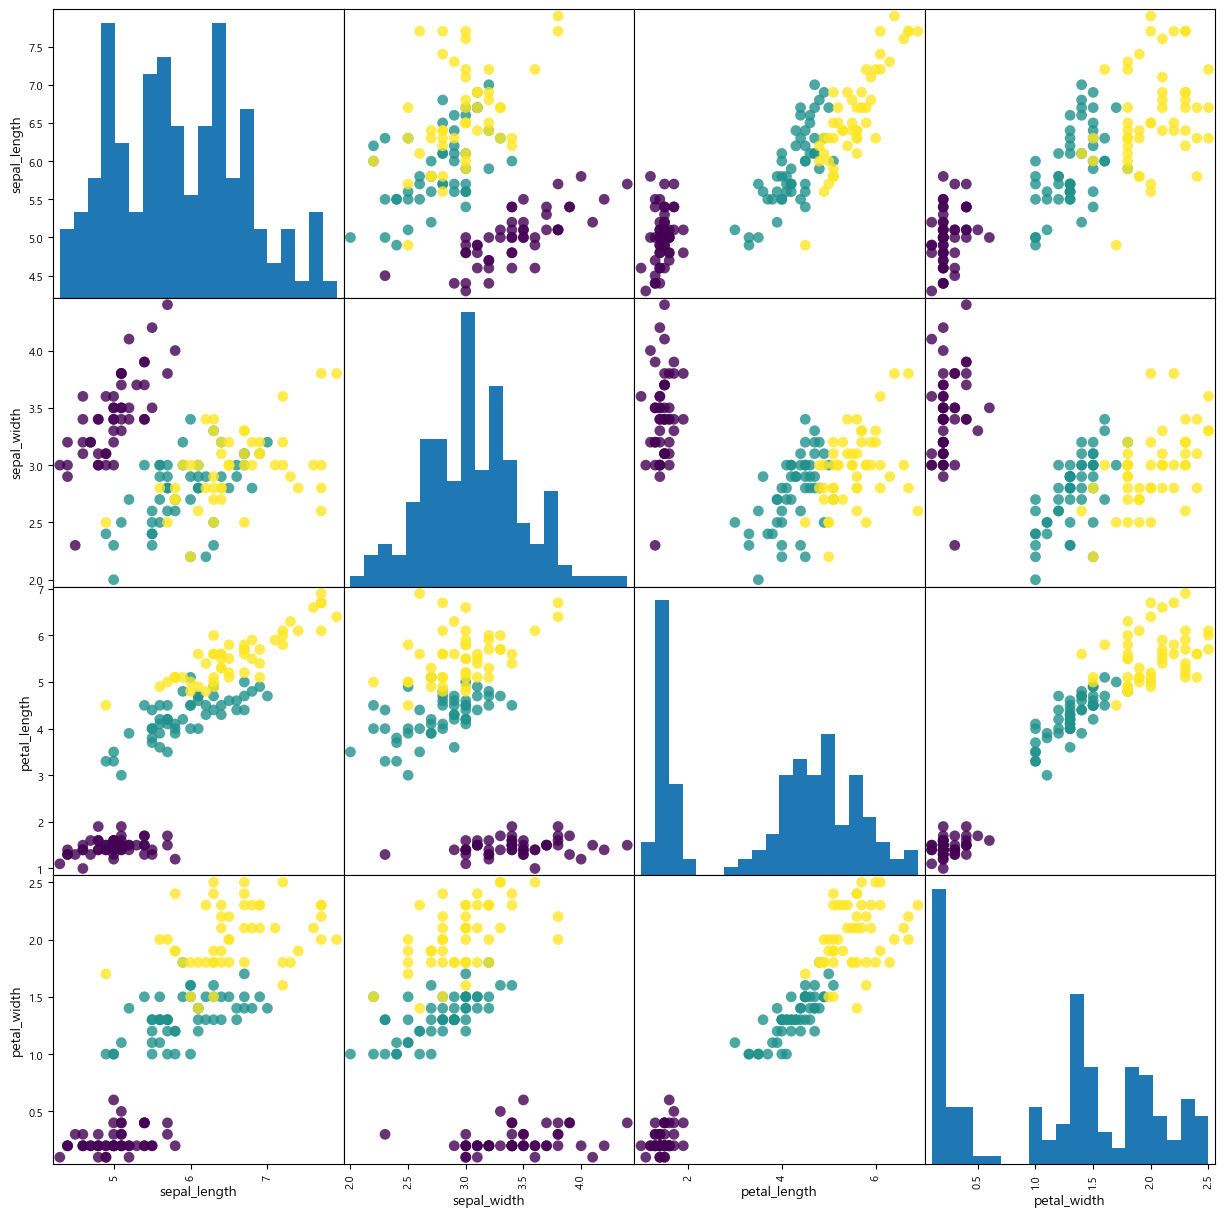

In [298]:
# 시각화를 통한 탐색
# 분포 확인 (scatter)
# 산점도행렬 : scatter matrix
#iris_df = pd.DataFrame(X_train , columns = iris.feature_names)
#sns.pairplot
pd.plotting.scatter_matrix(df , c = iris.target , figsize = (15,15) , marker = 'o' , hist_kwds = {'bins' : 20}, s = 60 , alpha = .8)
plt.show()

## 훈련 데이터와 테스트 데이터 분리

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
X_train , X_test , y_train , y_test = train_test_split(iris.data , iris.target , test_size = 0.25, random_state = 0)

In [301]:
y_train

array([1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1,
       2, 0])

# Modeling

In [302]:
from sklearn.neighbors import KNeighborsClassifier

In [303]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [304]:
knn.fit(X_train , y_train)

KNeighborsClassifier()

- 하이퍼 파라미터의 기본값들
- KNeighborsClassifier(n_neighbors = 5 , algorithm = 'auto' , leaf_size = 30 , metric = 'minkowski' , metric_params = None , n_jobs = 1 , p = 2 , weights = 'uniform')

In [305]:
for i in range(1,113,2):
    knnn = KNeighborsClassifier(n_neighbors = i)
    knnn.fit(X_train , y_train)
    score = knnn.score(X_train , y_train)
    print(score)

1.0
0.9642857142857143
0.9732142857142857
0.9732142857142857
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9642857142857143
0.9553571428571429
0.9464285714285714
0.9464285714285714
0.9642857142857143
0.9375
0.9553571428571429
0.9464285714285714
0.9464285714285714
0.9375
0.9375
0.9464285714285714
0.9464285714285714
0.9464285714285714
0.9464285714285714
0.9375
0.9285714285714286
0.9285714285714286
0.9285714285714286
0.9196428571428571
0.9196428571428571
0.9285714285714286
0.8839285714285714
0.8839285714285714
0.9017857142857143
0.8482142857142857
0.8392857142857143
0.8125
0.8035714285714286
0.8035714285714286
0.8035714285714286
0.7946428571428571
0.7857142857142857
0.7857142857142857
0.7857142857142857
0.7857142857142857
0.7767857142857143
0.7589285714285714
0.7589285714285714
0.7589285714285714
0.7410714285714286
0.7053571428571429
0.6964285714285714
0.6964285714285714
0.6964285714285714
0.36607142857142855
0.36607142857142855


In [306]:
X_new = np.array([[5,2.9,1,0.2]])

In [307]:
yhat = knn.predict(X_new)

In [308]:
iris.target_names[yhat]

array(['setosa'], dtype='<U10')

## 모델 평가

In [309]:
iris.target_names[knn.predict(X_test)]

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype='<U10')

In [310]:
((iris.target_names[y_test] == iris.target_names[knn.predict(X_test)]).sum())/len(iris.target_names[knn.predict(X_test)])

0.9736842105263158

### 최적의 K 찾기

- confusition_matrix(실제값 , 예측값) : 혼돈행렬
- accuracy_score(실제값 , 예측값) : 재현율 , 민감도 , 정밀도 , F1 Score , ROC curve

In [311]:
from sklearn.metrics import accuracy_score

In [312]:
n = 100
acc = np.zeros([n-1])

for i in range(1,n):
    clf = KNeighborsClassifier(n_neighbors = i).fit(X_train , y_train)
    yhat = clf.predict(X_test)
    acc[i-1] = accuracy_score(y_test , yhat)
    
print(acc)

[0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 0.94736842
 0.94736842 0.94736842 0.94736842 0.92105263 0.89473684 0.94736842
 0.94736842 0.97368421 0.92105263 0.94736842 0.92105263 0.94736842
 0.92105263 0.92105263 0.92105263 0.86842105 0.89473684 0.86842105
 0.86842105 0.89473684 0.89473684 0.89473684 0.89473684 0.86842105
 0.89473684 0.89473684 0.89473684 0.86842105 0.92105263 0.89473684
 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684 0.89473684
 0.89473684 0.89473684 0.81578947 0.81578947 0.81578947 0.84210526
 0.84210526 0.84210526 0.71052632 0.68421053 0.65789474 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895 0.63157895
 0.60526316 0.60526316 0.60526316 0.60526316 0.60526316 0.6052

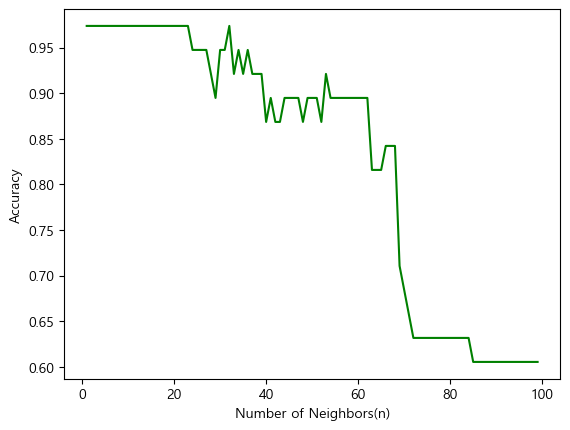

In [313]:
plt.plot(range(1,n) , acc , color = 'g')
plt.xlabel('Number of Neighbors(n)')
plt.ylabel('Accuracy')
plt.show()